# TREND ANALYSIS

<img src='https://raw.githubusercontent.com/mdsatria/dataviz_course/master/notebook/img/kowalski.png'>

Analisis tren adalah proses untuk mendapatkan pola yang memiliki generalisasi terhadap data dan memiliki sifat yang berulang-ulang. Pola ini merupakan terdiri dari dua komponen, variabel bebas ($x$) dan variabel tergantung ($y$).

Variabel $x$ umumnya merupakan satuan waktu (detik, jam, hari, bulan, tahun, dsb) dan variabel $y$ merupakan hasil pengukuran **satu atribut** dari **suatu objek**. Namun, variabel $x$ dapat juga bukan merupakan waktu melainkan suatu sekuen nilai yang linear. Misalnya [1, 2, 3, 4, ..., n] atau $[x_1, x_2, x_3, x_4, ..., x_n]$.

Pola yang tercipta dari analisis tren dapat digunakan untuk memprediksikan nilai $y_n$. Visualisasi tren sudah dapat menemukan pola secara garis besar. Secara lebih jauh, kita dapat menggunakan perhitungan matematika untuk menentukan pola dan membuat prediksi.



## Analisis Cuaca di Denpasar pada Tahun 1990-2020

## Dataset

In [63]:
import pandas as pd # pengolahan dataset, plot
import numpy as np # numerical computing, pengolahan matrix
import seaborn as sns # high level plotting, matplotlib wrapper
import matplotlib.pyplot as plt # plotting
import calendar # kalender

In [64]:
# set style 
plt.style.use('ggplot')

In [65]:
# https://openweathermap.org/
df = pd.read_csv('../dataset/denpasar_weathers.csv')

In [66]:
df.head(3)

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1/1/1990 0:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,1/1/1990 1:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,1/1/1990 2:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d


In [67]:
df.shape

(264924, 29)

In [68]:
df.columns

Index(['dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'rain_6h', 'rain_12h', 'rain_24h', 'rain_today', 'snow_1h',
       'snow_3h', 'snow_6h', 'snow_12h', 'snow_24h', 'snow_today',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [69]:
df['weather_main'].unique()

array(['Rain', 'Clouds', 'Thunderstorm', 'Clear', 'Haze', 'Dust', 'Fog',
       'Mist', 'Squall', 'Tornado', 'Smoke', 'Drizzle', 'Ash'],
      dtype=object)

**Deskripsi dataset :**

Dataset tersebut menggambarkan keadaan cuaca di Denpasar dari kurun waktu 1990-2020 yang diambil setiap jam.

## Data Cleaning

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264924 entries, 0 to 264923
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               264924 non-null  object 
 1   timezone             264924 non-null  int64  
 2   city_name            264924 non-null  object 
 3   lat                  264924 non-null  float64
 4   lon                  264924 non-null  float64
 5   temp                 264924 non-null  float64
 6   temp_min             264924 non-null  float64
 7   temp_max             264924 non-null  float64
 8   pressure             264924 non-null  float64
 9   humidity             264924 non-null  int64  
 10  wind_speed           264924 non-null  float64
 11  wind_deg             264924 non-null  int64  
 12  rain_1h              16286 non-null   float64
 13  rain_3h              16156 non-null   float64
 14  rain_6h              36098 non-null   float64
 15  rain_12h         

In [71]:
df.isnull().sum()

dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
temp_min                    0
temp_max                    0
pressure                    0
humidity                    0
wind_speed                  0
wind_deg                    0
rain_1h                248638
rain_3h                248768
rain_6h                228826
rain_12h               264912
rain_24h               258107
rain_today             264924
snow_1h                264924
snow_3h                264924
snow_6h                264924
snow_12h               264924
snow_24h               264924
snow_today             264924
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [72]:
df.columns

Index(['dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'rain_6h', 'rain_12h', 'rain_24h', 'rain_today', 'snow_1h',
       'snow_3h', 'snow_6h', 'snow_12h', 'snow_24h', 'snow_today',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [73]:
df.drop(['rain_1h','rain_3h', 'rain_6h', 'rain_12h', 'rain_24h', 'rain_today', 'snow_1h',
       'snow_3h', 'snow_6h', 'snow_12h', 'snow_24h', 'snow_today',
       'clouds_all', 'weather_id','weather_icon','timezone', 'city_name', 'lat', 'lon'], axis=1, inplace=True)

In [74]:
df.columns

Index(['dt_iso', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'weather_main', 'weather_description'],
      dtype='object')

## Datetime Handling

Salah satu kelebihan Pandas adalah kemampuan memproses time series data (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html). Data yang memiliki tipe time series  bermanfaat untuk analisis trend dengan lebih mudah. Kita dapat mengekstrak pola berdasarkan interval waktu, memberikan informasi yang mudah dicerna melalui visualisasi serta melakukan prediksi nilai.

In [75]:
df['date'] = pd.to_datetime(df['dt_iso'], infer_datetime_format=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264924 entries, 0 to 264923
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dt_iso               264924 non-null  object        
 1   temp                 264924 non-null  float64       
 2   temp_min             264924 non-null  float64       
 3   temp_max             264924 non-null  float64       
 4   pressure             264924 non-null  float64       
 5   humidity             264924 non-null  int64         
 6   wind_speed           264924 non-null  float64       
 7   wind_deg             264924 non-null  int64         
 8   weather_main         264924 non-null  object        
 9   weather_description  264924 non-null  object        
 10  date                 264924 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 22.2+ MB


In [77]:
df.drop(['dt_iso'], axis=1, inplace=True)

In [78]:
df.head(3)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description,date
0,25.82,25.82,25.82,1010.0,86,1.36,225,Rain,light rain,1990-01-01 00:00:00
1,26.20,26.20,26.20,1011.0,84,2.09,247,Rain,light rain,1990-01-01 01:00:00
2,26.45,26.45,26.45,1011.0,84,2.44,262,Rain,light rain,1990-01-01 02:00:00


## Indexing dengan Datetime

<img src='https://raw.githubusercontent.com/mdsatria/dataviz_course/master/notebook/img/iwillfindyou.png'>

**Indexing DataFrame biasa di Pandas**

Indexing row/object data dalam pandas dapat menggunakan fungsi *.loc* atau *.iloc*. Secara umum formatnya adalah sebagai berikut :

    nama_DataFrame.iloc[*index]  # hanya dapat menggunakan posisi integer
    nama_DataFrame.loc[*index]   # dapat menggunakan label

*index terdiri dari 2 int

[:,:] = memilih semua row dan column <br>
[0,:] = memilih row ke-0 dan semua column <br>
[:,0] = memilih semua row dan column ke-0

In [79]:
df.iloc[0,:]

temp                                 25.82
temp_min                             25.82
temp_max                             25.82
pressure                              1010
humidity                                86
wind_speed                            1.36
wind_deg                               225
weather_main                          Rain
weather_description             light rain
date                   1990-01-01 00:00:00
Name: 0, dtype: object

**Indexing dengan DateTime**

Adanya timestamp dalam dataset dapat memudahkan kita dalam melihat data sesuai dengan waktu yang kita ingginkan. Misalkan saja, Anda ingin mengetahui suhu sepanjang tahun 1990, suhu pada bulan Desember 2010 atau suhu pada tanggal 1 Januari 2002 pukul 15.00. 

Untuk melakukan hal tersebut, kita harus mengubah index data kita dengan timestamp.

In [80]:
df = df.set_index('date')

In [81]:
df.head(3)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description
date,,,,,,,,,
1990-01-01 00:00:00,25.82,25.82,25.82,1010.0,86,1.36,225,Rain,light rain
1990-01-01 01:00:00,26.20,26.20,26.20,1011.0,84,2.09,247,Rain,light rain
1990-01-01 02:00:00,26.45,26.45,26.45,1011.0,84,2.44,262,Rain,light rain


Jika Anda perhatikan cuplikan dataset di atas, terlihat index dataset saat ini adalah date/tanggal. Dengan index tersebut kita dapat memilih (istilahnya *slicing* data) objek data/row dengan datetime. 

Indexing sesuai dengan format tanggal. Dalam contoh dataset kita, formatnya adalah YYYY-MM-DD, HH-MM-SS (year - month - day, hour - minute - second). Maka, sesuai format tersebut kita dapat memilih object data sebagai berikut :

    1. df.loc['1990'] = menampilkan semua data pada tahun 1990
    2. df.loc['1990-01'] = menampilkan semua data pada bulan Januari tahun 1990
    3. df.loc['1990-01-01'] = menampilkan semua data pada tanggal 1 bulan Januari tahun 1990
    dst
    
Secara umum, penulisannya adalah sebagai berikut :
**nama_DataFrame['YYYY-MM-DD  HH:MM:SS']**

In [82]:
df.loc['2000']

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description
date,,,,,,,,,
2000-01-01 00:00:00,25.90,25.90,25.90,1007.1,89,1.50,60,Rain,light rain
2000-01-01 01:00:00,28.00,28.00,28.00,1005.1,83,1.50,260,Clouds,broken clouds
2000-01-01 02:00:00,29.00,29.00,29.00,1007.1,79,4.60,280,Clouds,few clouds
2000-01-01 03:00:00,29.60,29.60,29.60,1007.1,76,4.10,280,Clouds,few clouds
2000-01-01 04:00:00,30.00,30.00,30.00,1006.1,74,3.10,270,Clouds,few clouds
...,...,...,...,...,...,...,...,...,...
2000-12-31 19:00:00,27.80,27.80,27.80,1008.0,73,2.99,251,Clouds,scattered clouds
2000-12-31 20:00:00,27.72,27.72,27.72,1008.0,73,2.95,250,Clouds,scattered clouds
2000-12-31 21:00:00,25.40,25.40,25.40,1008.1,91,2.71,249,Clouds,few clouds


### <div class="alert alert-block alert-info">Latihan 1</div> 

*1. Tampilkan data pada hari tanggal 3 september 2002!*

In [83]:
# tulis code di sini

(tulis jawaban di sini)

*2. Berapakah rata-rata suhu pada bulan Januari 2010?*

In [84]:
# tulis code di sini

(tulis jawaban di sini)

*3. Di antara dua bulan, yaitu bulan Desember 1998 dan Desember 1997, manakah yang memiliki kelembapan rata-rata yang lebih rendah?*

In [85]:
# tulis code di sini

(tulis jawaban di sini)

## Feature Engineering

Dengan index berupa datetime, kita dapat melakukan feature engineering lebih lanjut untuk mendapatkan atribut seperti tahun, bulan, tanggal dst.

<div class="alert alert-block alert-info">
    
**QUIZ TIME!**


**Apa yang disebut dengan feature engineering ?**</div> 

<img src='https://raw.githubusercontent.com/mdsatria/dataviz_course/master/notebook/img/batman.gif'>



*(gunakan bahasa sendiri)*

* Feature engineering adalah .......................



* Tujuan dari feature engineering secara umum adalah..............





In [86]:
df.index.year

Int64Index([1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='date', length=264924)

In [87]:
df['weekday_name'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour
df['day'] = df.index.day

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264924 entries, 1990-01-01 00:00:00 to 2020-01-07 23:00:00
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temp                 264924 non-null  float64
 1   temp_min             264924 non-null  float64
 2   temp_max             264924 non-null  float64
 3   pressure             264924 non-null  float64
 4   humidity             264924 non-null  int64  
 5   wind_speed           264924 non-null  float64
 6   wind_deg             264924 non-null  int64  
 7   weather_main         264924 non-null  object 
 8   weather_description  264924 non-null  object 
 9   weekday_name         264924 non-null  object 
 10  year                 264924 non-null  int64  
 11  month                264924 non-null  int64  
 12  hour                 264924 non-null  int64  
 13  day                  264924 non-null  int64  
dtypes: float64(5), int64(6), object(3)

In [89]:
df.head(5)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description,weekday_name,year,month,hour,day
date,,,,,,,,,,,,,,
1990-01-01 00:00:00,25.82,25.82,25.82,1010.0,86,1.36,225,Rain,light rain,Monday,1990,1,0,1
1990-01-01 01:00:00,26.20,26.20,26.20,1011.0,84,2.09,247,Rain,light rain,Monday,1990,1,1,1
1990-01-01 02:00:00,26.45,26.45,26.45,1011.0,84,2.44,262,Rain,light rain,Monday,1990,1,2,1
1990-01-01 03:00:00,26.80,26.80,26.80,1011.0,82,2.29,271,Rain,light rain,Monday,1990,1,3,1
1990-01-01 04:00:00,27.04,27.04,27.04,1010.0,82,1.71,274,Clouds,broken clouds,Monday,1990,1,4,1


## Datetime Resample

Mari kita coba visualisasikan suhu

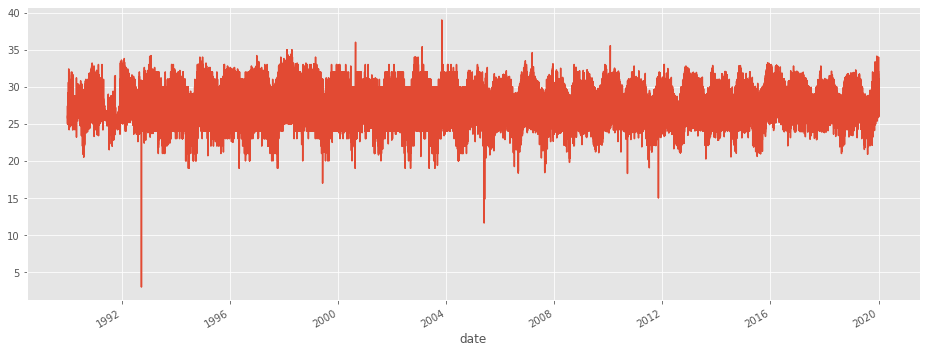

In [90]:
df['temp'].plot(figsize=(16,6))

Dari plot di atas kita dapat melihat grafik yang kita tampilkan terlalu dense/padat. Hal ini dikarenakan banyaknya poin data yang terhubung, sejumlah $RentangTahun\times12\times365\times24$.

Untuk mengatasi hal tersebut, kita dapat menggunakan **.resample()** untuk menyampling ulang dataset ke dalam bentuk aggregatnya. Misalnya dalam bentuk per-bulan, per-tahun, per-kuartal, dst.

In [91]:
df.columns

Index(['temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'weather_main', 'weather_description', 'weekday_name',
       'year', 'month', 'hour', 'day'],
      dtype='object')

**PERHATIKAN TIPE ATRIBUT UNTUK RESAMPLING**

Tidak semua tipe atribut cocok diterapkan untuk fungsi aggregat yang sama. Lihat lagi materi tentang Data dalam folder materi.

Contoh kali ini kita akan menggunakan atribut numerik/ratio.

In [92]:
columns = ['temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed']

Penentuan parameter resample dapat Anda lihat di https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

Kali ini kita akan sampling data per-bulan.

In [93]:
df_month = df[columns].resample('M').mean()

In [94]:
df_month.head(3)

,temp,temp_min,temp_max,pressure,humidity,wind_speed
date,,,,,,
1990-01-31,27.051626,27.051626,27.051626,1008.166398,82.573925,3.510081
1990-02-28,26.832262,26.832262,26.832262,1010.791518,84.464286,2.479628
1990-03-31,27.152272,27.152272,27.152272,1010.188575,83.587366,3.664556


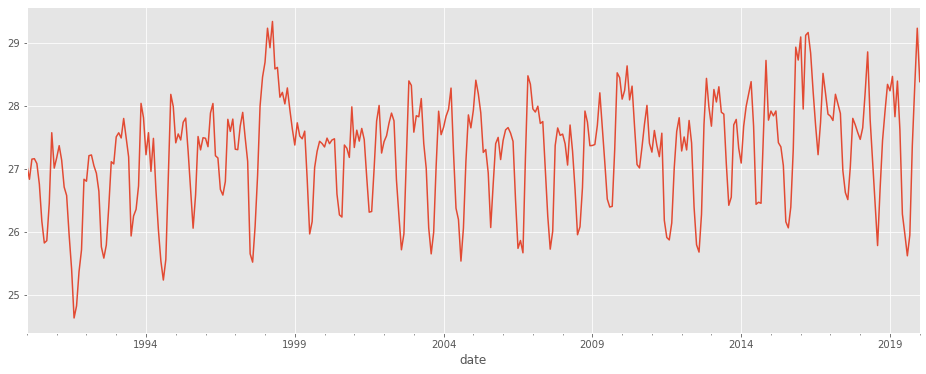

In [95]:
df_month['temp'].plot(figsize=(16,6))

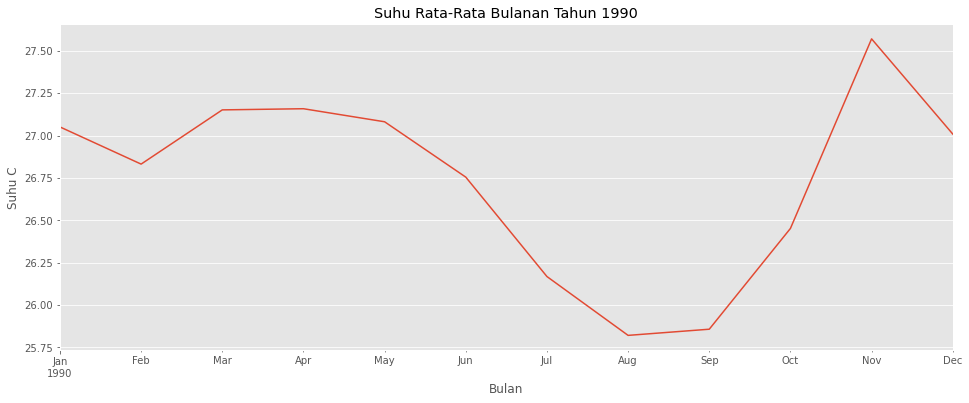

In [96]:
df_month.loc['1990']['temp'].plot(figsize=(16,6))
plt.title('Suhu Rata-Rata Bulanan Tahun 1990')
plt.ylabel('Suhu C')
plt.xlabel('Bulan')
plt.show()

Artikel informatif terkait *resample()* Pandas https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4

### <div class="alert alert-block alert-info">Latihan 2</div> 

*1. Resample data menjadi 3 bulan sekali dan simpan ke variabel df_quarter*

In [97]:
# code di sini

*2. Bulan apakah yang memiliki kecepatan angin terendah dalam tahun 1998? Buktikan dalam visualisasi*

In [98]:
# code di sini

(tulis jawaban di sini)

## Visualization

### Pertanyaan

    1. Bagaimanakah pola cuaca dari 1990-2019 ?
    2. Bagaimana pola hujan dari tahun 1990, 2000, 2019 ?
    3. Bagaimana pola suhu dalam satu bulan di bulan Desember 1995 ?

### Solusi

**Pola Cuaca dari tahun 1990-2019**

Kita lihat dulu jenis cuaca dalam dataset

**Gambaran umum**

In [99]:
df['weather_main'].unique()

array(['Rain', 'Clouds', 'Thunderstorm', 'Clear', 'Haze', 'Dust', 'Fog',
       'Mist', 'Squall', 'Tornado', 'Smoke', 'Drizzle', 'Ash'],
      dtype=object)

In [100]:
df['weather_main'].value_counts()

Clouds          220657
Rain             34901
Thunderstorm      4724
Clear             3941
Haze               548
Mist                74
Smoke               29
Fog                 16
Dust                10
Drizzle              8
Tornado              8
Squall               4
Ash                  4
Name: weather_main, dtype: int64

In [101]:
df.groupby(['year', 'month', 'weather_main']).size()

year  month  weather_main
1990  1      Clouds          374
             Rain            367
             Thunderstorm      3
      2      Clear             9
             Clouds          410
                            ... 
2019  12     Thunderstorm     34
2020  1      Clouds          148
             Drizzle           1
             Rain             15
             Thunderstorm      4
Length: 1404, dtype: int64

In [102]:
df.groupby(['year', 'month', 'weather_main']).size().unstack(2)

weather_main  Ash  Clear  Clouds  Drizzle  Dust  Fog  Haze  Mist   Rain  \
year month                                                                
1990 1        NaN    NaN   374.0      NaN   NaN  NaN   NaN   NaN  367.0   
     2        NaN    9.0   410.0      NaN   NaN  NaN   NaN   NaN  253.0   
     3        NaN    3.0   435.0      NaN   NaN  NaN   3.0   NaN  303.0   
     4        NaN   47.0   422.0      NaN   NaN  NaN   NaN   NaN  248.0   
     5        NaN   44.0   435.0      NaN   NaN  NaN   NaN   NaN  265.0   
...           ...    ...     ...      ...   ...  ...   ...   ...    ...   
2019 9        NaN    2.0   708.0      NaN   NaN  NaN   NaN   NaN   10.0   
     10       NaN    4.0   735.0      NaN   NaN  NaN   NaN   1.0    4.0   
     11       NaN    2.0   709.0      NaN   NaN  NaN   NaN   NaN    9.0   
     12       NaN    NaN   668.0      NaN   NaN  NaN   5.0   NaN   47.0   
2020 1        NaN    NaN   148.0      1.0   NaN  NaN   NaN   NaN   15.0   

weather_main  Smoke  Squall  Thunderstorm  Tornado  
year month                                          
1990 1          NaN     NaN           3.0      NaN  
     2          NaN     NaN           NaN      NaN  
     3          NaN     NaN           NaN      NaN  
     4          NaN     NaN           3.0      NaN  
     5          NaN     NaN           NaN      NaN  
...             ...     ...           ...      ...  
2019 9          NaN     NaN           NaN      NaN  
     10         NaN     NaN           NaN      NaN  
     11         NaN     NaN           NaN      NaN  
     12         NaN     NaN          34.0      NaN  
2020 1          NaN     NaN           4.0      NaN  

[361 rows x 13 columns]

In [103]:
df.groupby(['year', 'month', 'weather_main']).size().unstack(2).fillna(0)

weather_main  Ash  Clear  Clouds  Drizzle  Dust  Fog  Haze  Mist   Rain  \
year month                                                                
1990 1        0.0    0.0   374.0      0.0   0.0  0.0   0.0   0.0  367.0   
     2        0.0    9.0   410.0      0.0   0.0  0.0   0.0   0.0  253.0   
     3        0.0    3.0   435.0      0.0   0.0  0.0   3.0   0.0  303.0   
     4        0.0   47.0   422.0      0.0   0.0  0.0   0.0   0.0  248.0   
     5        0.0   44.0   435.0      0.0   0.0  0.0   0.0   0.0  265.0   
...           ...    ...     ...      ...   ...  ...   ...   ...    ...   
2019 9        0.0    2.0   708.0      0.0   0.0  0.0   0.0   0.0   10.0   
     10       0.0    4.0   735.0      0.0   0.0  0.0   0.0   1.0    4.0   
     11       0.0    2.0   709.0      0.0   0.0  0.0   0.0   0.0    9.0   
     12       0.0    0.0   668.0      0.0   0.0  0.0   5.0   0.0   47.0   
2020 1        0.0    0.0   148.0      1.0   0.0  0.0   0.0   0.0   15.0   

weather_main  Smoke  Squall  Thunderstorm  Tornado  
year month                                          
1990 1          0.0     0.0           3.0      0.0  
     2          0.0     0.0           0.0      0.0  
     3          0.0     0.0           0.0      0.0  
     4          0.0     0.0           3.0      0.0  
     5          0.0     0.0           0.0      0.0  
...             ...     ...           ...      ...  
2019 9          0.0     0.0           0.0      0.0  
     10         0.0     0.0           0.0      0.0  
     11         0.0     0.0           0.0      0.0  
     12         0.0     0.0          34.0      0.0  
2020 1          0.0     0.0           4.0      0.0  

[361 rows x 13 columns]

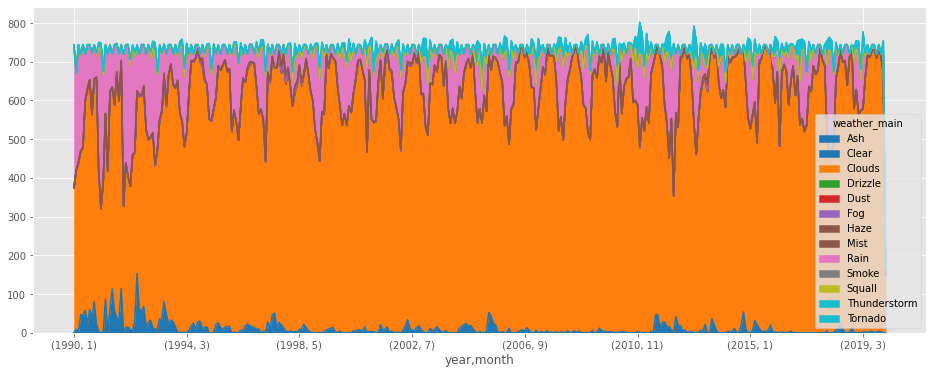

In [104]:
df.groupby(['year', 'month', 'weather_main']).size().unstack(2).fillna(0).plot(kind='area', figsize=(16,6), cmap='tab10')

**Cuaca hujan dan kemarau per tahun**

In [105]:
cuaca = df.groupby(['year', 'weather_main']).size().unstack(1).fillna(0)
cuaca

weather_main,Ash,Clear,Clouds,Drizzle,Dust,Fog,Haze,Mist,Rain,Smoke,Squall,Thunderstorm,Tornado
year,,,,,,,,,,,,,
1990,0.0,389.0,5962.0,0.0,0.0,0.0,12.0,0.0,2385.0,0.0,0.0,24.0,0.0
1991,0.0,529.0,5740.0,0.0,0.0,0.0,18.0,0.0,2450.0,0.0,0.0,33.0,0.0
1992,0.0,486.0,5731.0,0.0,3.0,0.0,29.0,0.0,2488.0,0.0,0.0,75.0,0.0
1993,0.0,322.0,6773.0,0.0,0.0,0.0,52.0,0.0,1557.0,0.0,0.0,78.0,0.0
1994,0.0,161.0,7514.0,0.0,1.0,0.0,40.0,0.0,1011.0,0.0,0.0,64.0,0.0
1995,0.0,119.0,7375.0,0.0,0.0,0.0,12.0,0.0,1235.0,0.0,0.0,42.0,0.0
1996,0.0,122.0,7354.0,0.0,0.0,0.0,14.0,0.0,1252.0,0.0,0.0,80.0,0.0
1997,0.0,221.0,7548.0,0.0,0.0,10.0,110.0,0.0,852.0,0.0,0.0,38.0,0.0
1998,0.0,73.0,7512.0,0.0,3.0,0.0,56.0,0.0,989.0,0.0,0.0,158.0,0.0


In [106]:
# apply adalah function dalam pandas. fungsi apply adalah mengaplikasikan sebuah fungsi yang didefinisikan oleh user
cuaca = round(
    (cuaca.apply(lambda x : x/x.sum(), axis=1)*100)
    ,0)

In [107]:
cuaca

weather_main,Ash,Clear,Clouds,Drizzle,Dust,Fog,Haze,Mist,Rain,Smoke,Squall,Thunderstorm,Tornado
year,,,,,,,,,,,,,
1990,0.0,4.0,68.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0
1991,0.0,6.0,65.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0
1992,0.0,6.0,65.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,1.0,0.0
1993,0.0,4.0,77.0,0.0,0.0,0.0,1.0,0.0,18.0,0.0,0.0,1.0,0.0
1994,0.0,2.0,85.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0
1995,0.0,1.0,84.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0
1996,0.0,1.0,83.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,1.0,0.0
1997,0.0,3.0,86.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
1998,0.0,1.0,85.0,0.0,0.0,0.0,1.0,0.0,11.0,0.0,0.0,2.0,0.0


In [108]:
cuaca['hujan'] = cuaca['Rain'].values + cuaca['Thunderstorm'].values
cuaca['cerah'] = cuaca['Clouds'].values + cuaca['Clear'].values

In [109]:
cuaca['dll'] = (100 -(cuaca['hujan'] + cuaca['cerah']))

In [110]:
cuaca

weather_main,Ash,Clear,Clouds,Drizzle,Dust,Fog,Haze,Mist,Rain,Smoke,Squall,Thunderstorm,Tornado,hujan,cerah,dll
year,,,,,,,,,,,,,,,,
1990,0.0,4.0,68.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,27.0,72.0,1.0
1991,0.0,6.0,65.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,28.0,71.0,1.0
1992,0.0,6.0,65.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,1.0,0.0,29.0,71.0,0.0
1993,0.0,4.0,77.0,0.0,0.0,0.0,1.0,0.0,18.0,0.0,0.0,1.0,0.0,19.0,81.0,0.0
1994,0.0,2.0,85.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,13.0,87.0,0.0
1995,0.0,1.0,84.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,14.0,85.0,1.0
1996,0.0,1.0,83.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,1.0,0.0,15.0,84.0,1.0
1997,0.0,3.0,86.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0,89.0,1.0
1998,0.0,1.0,85.0,0.0,0.0,0.0,1.0,0.0,11.0,0.0,0.0,2.0,0.0,13.0,86.0,1.0


(1990.0, 2020.0)

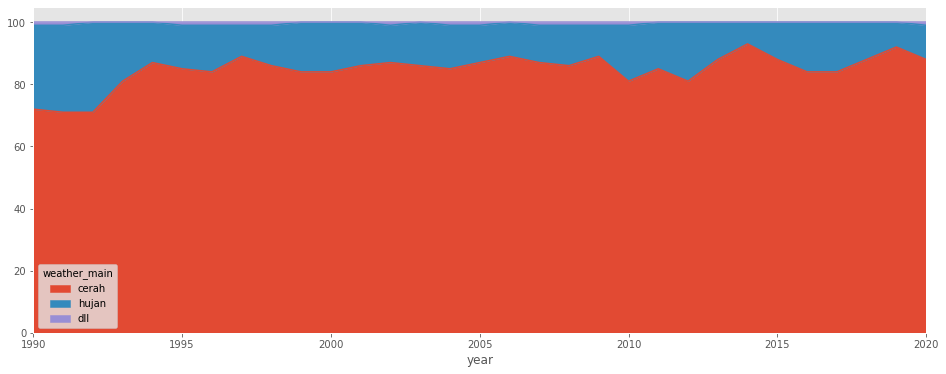

In [111]:
cuaca[['cerah', 'hujan', 'dll']].plot(kind='area', figsize=(16,6))
plt.xlim(1990,2020)

**Bagaimana pola hujan dari tahun 1990, 2000, 2019 ?**

Jawaban ini hampir sama dengan jawaban sebelumnya, untuk memudahkan kita akan membuat function dari proses di atas.

In [112]:
def cuaca_bulanan(tahun, cuaca):
    
    var = df.loc[str(tahun)].groupby(['month', 'weather_main']).size().unstack(1).fillna(0)
    var = round((var.apply(lambda x : x/x.sum(), axis=1)*100),0)
    
    if (cuaca=='hujan'):
        y = var['Rain'] + var['Thunderstorm']
    elif (cuaca=='cerah'):
        y = var['Clouds'] + var['Clear']
        
    return y

In [113]:
y = cuaca_bulanan(1990, 'hujan')

In [114]:
month_list = calendar.month_name[1:13]

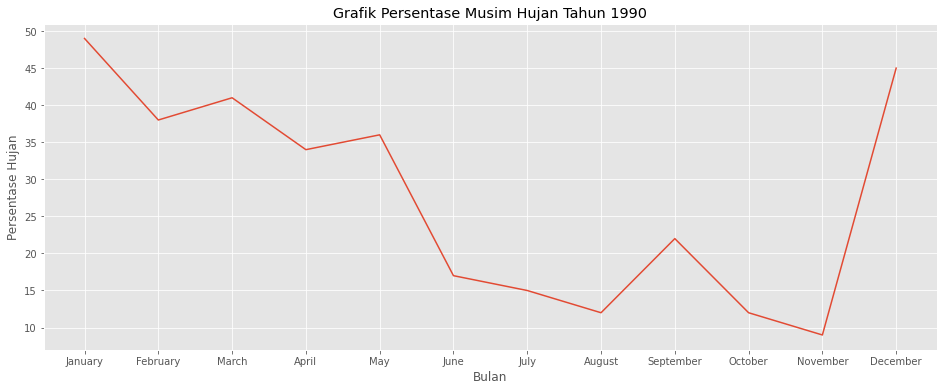

In [115]:
plt.figure(figsize=(16,6))
plt.title('Grafik Persentase Musim Hujan Tahun 1990')
plt.plot(y.index, y)
plt.xlabel('Bulan')
plt.ylabel('Persentase Hujan')
plt.xticks(ticks=y.index, labels=month_list)
plt.show()

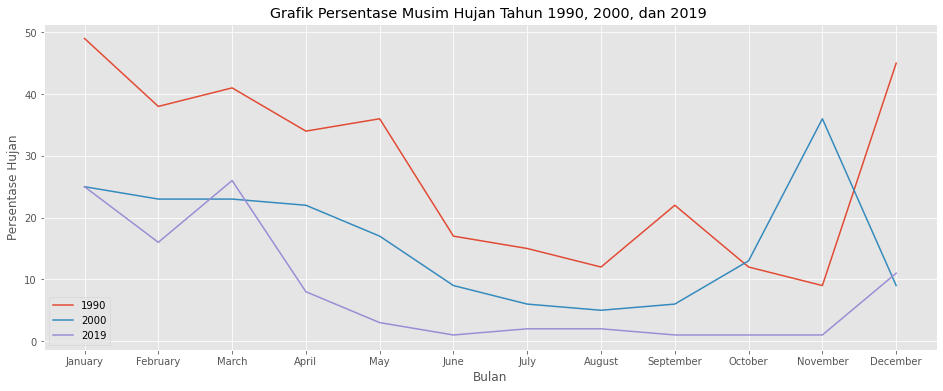

In [116]:
plt.figure(figsize=(16,6))
plt.title('Grafik Persentase Musim Hujan Tahun 1990, 2000, dan 2019 ')
for i in ([1990, 2000, 2019]):
    y = cuaca_bulanan(i, 'hujan')
    plt.plot(y.index, y, label=str(i))
plt.xlabel('Bulan')
plt.ylabel('Persentase Hujan')
plt.legend()
plt.xticks(ticks=y.index, labels=month_list)
plt.show()

**Bagaimana pola suhu dalam satu bulan di bulan Desember 1995**

Untuk menjawab pertanyaan ini, kita akan menggunakan grafik heatmap dan function pivot_table pada Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [117]:
data_satu_bulan = df.loc['1995-12']

In [118]:
data_satu_bulan.head(2)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description,weekday_name,year,month,hour,day
date,,,,,,,,,,,,,,
1995-12-01 00:00:00,26.01,26.01,26.01,1010.0,87,0.35,142,Clouds,overcast clouds,Friday,1995,12,0,1
1995-12-01 01:00:00,28.00,28.00,28.00,1010.8,83,1.50,250,Clouds,broken clouds,Friday,1995,12,1,1


In [119]:
pvt_table = data_satu_bulan.pivot_table(index='day', columns='hour', values='temp')

In [120]:
pvt_table

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
1,26.01,28.00,29.00,30.60,29.00,30.00,32.00,32.00,31.80,31.80,...,26.50,25.81,26.00,26.00,26.20,26.2,27.00,26.22,27.00,28.00
2,28.80,28.80,32.00,26.99,31.00,32.00,32.80,32.00,27.13,28.00,...,25.89,24.90,25.00,25.49,25.57,25.0,25.25,25.19,25.00,26.00
3,27.80,29.00,30.00,31.20,31.00,30.00,30.60,26.37,26.04,30.40,...,23.00,23.20,23.00,24.00,23.80,23.8,24.10,24.10,24.10,26.80
4,26.80,26.80,29.40,29.40,29.40,29.90,29.90,29.90,26.40,26.40,...,26.00,26.00,26.00,26.20,26.20,26.2,26.80,25.90,26.00,24.00
5,24.60,24.60,25.00,25.40,25.00,25.00,24.70,24.70,27.20,27.20,...,24.00,26.00,26.00,24.00,24.00,24.0,25.40,25.40,25.40,25.80
6,25.80,25.14,24.92,27.00,24.98,25.12,28.60,26.00,27.00,27.40,...,27.00,27.00,27.00,26.50,26.50,26.5,27.50,27.50,25.80,25.97
7,28.20,29.00,29.00,30.90,25.36,25.47,30.60,29.00,29.00,29.20,...,26.98,28.20,28.00,28.00,27.80,27.8,27.50,26.63,27.00,27.00
8,26.20,28.00,30.00,29.80,27.48,27.63,31.40,27.84,27.93,28.40,...,28.00,27.60,27.60,28.00,28.00,28.0,27.60,26.75,27.00,28.00
9,27.80,30.00,27.63,27.68,31.00,31.00,31.40,31.00,27.80,27.58,...,28.00,29.20,28.00,28.00,28.40,28.4,27.90,25.79,27.00,28.00


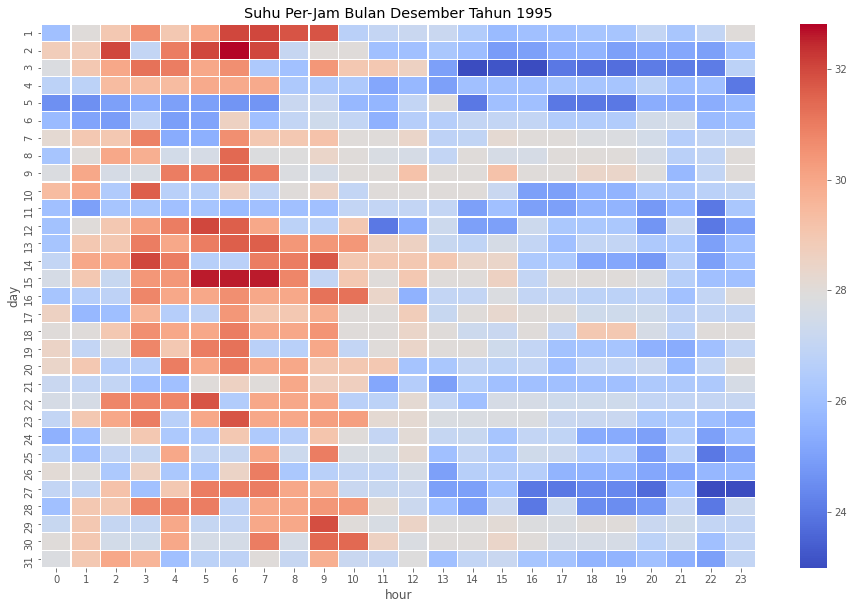

In [121]:
fig, ax1 = plt.subplots(figsize=(16,10))
plt.title('Suhu Per-Jam Bulan Desember Tahun 1995')
sns.heatmap(pvt_table, ax=ax1, cmap='coolwarm', linewidth=0.2)
plt.show()

## Storytelling

* **Who**<br>
    Siapa target audience Anda. Gunakan gaya bahasa yang sesuai dengan audience Anda. Namun, bahasa baku dengan ejaan yang benar adalah hal yang wajib
* **Why**<br>
    Kenapa Anda harus menceritakan data tersebut? Apa yang dapat diperoleh audience?
* **What**<br>
    Apa grafik yang Anda buat ?Pesan apa yang ingin Anda sampaikan? Dalam sekian banyak visual yang ada dalam sebuah grafik apa yang harus ditekankan? Apa pola yang menarik dalam sebuah grafik?
* **How**<br>
    Bagaimana cara Anda menceritakan informasi dalam visualisasi? Apakah dengan perbandingan kategori? Apakah dengan menceritakan perubahan nilai? Apakah menceritakan hubungan antar data?

Contoh penyajian informasi dalam grafik heatmap di atas :


Pada grafik heatmap di atas digambarkan suhu per-jam sepanjang hari selama bulan Desember tahun 2019. Sumbu x merupakan jam saat nilai suhu diambil dan sumbu y merupakan hari dalam bulan tersebut. Selain itu, nilai suhu digambarkan menggunakan gradasi warna dari biru ke merah. Semakin biru suhu semakin rendah dan semakin merah suhu semakin panas.

Suhu pada bulan Desember tahun 2019 mengalami perubahan setiap jamnya. Namun begitu, sepanjang hari dalam periode tersebut memiliki pola yang hampir sama. Suhu mengalami kenaikan dimulai dari pukul 00.00 hingga mencapai puncaknya di kisaran waktu 03.00-09.00.  Suhu terpanas pada bulan tersebut mencapai puncaknya pada tanggal 7, 24, 25 dan 30 Desember. Pada tanggal tersebut, periode terpanas (03.00-09.00) mencapai suhu tertinggi hingga 34 derajat Celcius. Tidak sama seperti pada jam-jam yang panas, periode dingin dalam sehari lebih menyebar waktunya.  Suhu paling ekstrim terjadi pada tanggal 7 Desember 2019 pada periode tersebut. Tercatat suhu terendah dan suhu tertinggi terjadi dalam hari yang sama. Secara umum, suhu akan menurun dari pagi sekitar jam 09.00 hingga malam pukul 23.00 dan kemudian meningkat hingga pagi sekitar pukul 06.00.


### <div class="alert alert-block alert-info">Latihan 3</div>

*1. Buatlah grafik heatmap yang menggambarkan kecepatan angin-perjam dalam bulan Januari 1990 dan Januari 2019!*

In [122]:
# code di sini

In [123]:
# code di sini

*2. Informasi apa yang dapat Anda ambil dalam grafik Latihan 3 no 1 di atas? Kemukakan minimal 3 informasi penting dalam kalimat yang memiliki minimal 120 kata*

(tulis jawaban di sini)